<a href="https://colab.research.google.com/github/Nayanpatel009/Assignment/blob/main/Assignment7_16_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
plt.rcParams['figure.figsize'] = (16, 10)
plt.rc('font', size=15)

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


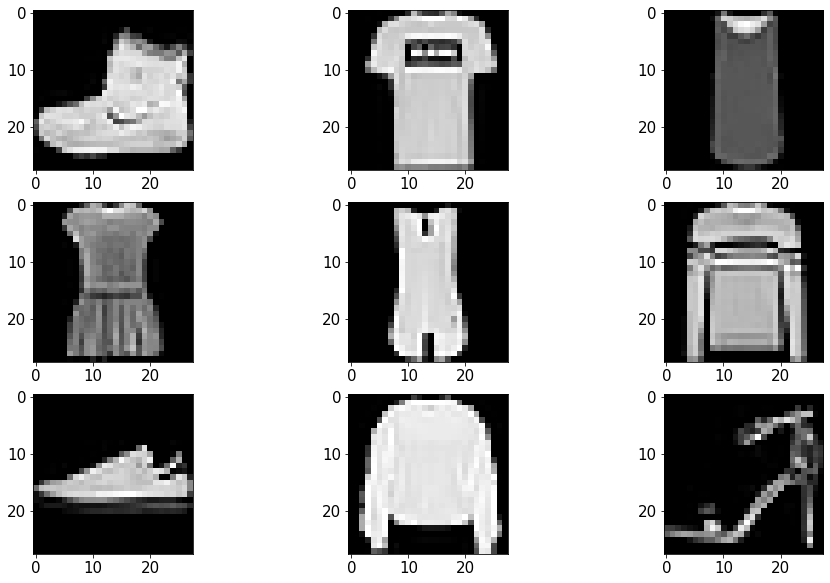

In [ ]:
from matplotlib import pyplot
from keras.datasets import fashion_mnist
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
for i in range(9):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print(X_train[0])
print(y_train[0])
print(X_train.shape)
print(y_train.shape)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [ ]:
X_train = X_train / 255.
X_train = X_train.reshape([-1, 28*28])
X_train = X_train.astype(np.float32)
y_train = y_train.astype(np.int32)

X_test = X_test / 255.
X_test = X_test.reshape([-1, 28*28])
X_test = X_test.astype(np.float32)
y_test = y_test.astype(np.int32)

In [ ]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))\
           .shuffle(buffer_size=len(X_train))\
           .batch(batch_size=128)\
           .prefetch(buffer_size=128)\
           .repeat()

test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test))\
            .batch(batch_size=128)\
            .prefetch(buffer_size=128)\
            .repeat()

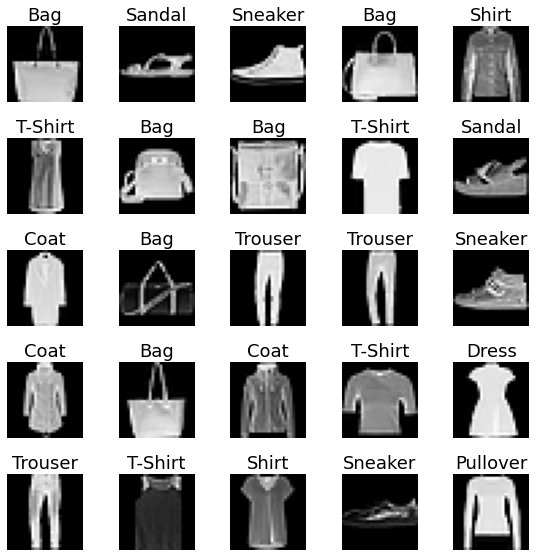

In [ ]:
labels_map = {0: 'T-Shirt', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat',
              5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle Boot'}
columns = 5
rows = 5
fig = plt.figure(figsize=(8, 8))

for i in range(1, columns * rows+1):
    data_idx = np.random.randint(len(X_train))
    img = X_train[data_idx].reshape([28, 28])
    label = labels_map[y_train[data_idx]]

    fig.add_subplot(rows, columns, i)
    plt.title(label)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
model = tf.keras.Sequential(name='nn')

model.add(tf.keras.layers.Dense(256, input_shape=(28*28, )))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.ReLU())
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "nn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 204,554
Trainable params: 204,042
Non-trainable params: 512
_________________________________________________________________


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
model.fit(train_ds, batch_size=128, steps_per_epoch=len(X_train)/128, epochs=10)

Epoch 1/10
468/468 [==============================] - 5s 3ms/step - loss: 0.4553 - accuracy: 0.8346
Epoch 2/10
468/468 [==============================] - 2s 3ms/step - loss: 0.3443 - accuracy: 0.8751
Epoch 3/10
468/468 [==============================] - 2s 3ms/step - loss: 0.3067 - accuracy: 0.8871
Epoch 4/10
468/468 [==============================] - 2s 3ms/step - loss: 0.2857 - accuracy: 0.8943
Epoch 5/10
468/468 [==============================] - 2s 3ms/step - loss: 0.2681 - accuracy: 0.9004
Epoch 6/10
468/468 [==============================] - 2s 3ms/step - loss: 0.2505 - accuracy: 0.9063
Epoch 7/10
468/468 [==============================] - 2s 3ms/step - loss: 0.2378 - accuracy: 0.9118
Epoch 8/10
468/468 [==============================] - 2s 3ms/step - loss: 0.2226 - accuracy: 0.9178
Epoch 9/10
468/468 [==============================] - 2s 4ms/step - loss: 0.2137 - accuracy: 0.9198
Epoch 10/10
468/468 [==============================] - 2s 4ms/step - loss: 0.2040 - accuracy: 0.9247

In [ ]:
loss, acc = model.evaluate(test_ds, steps=len(X_test)/128)
print('test loss is {}'.format(loss))
print('test accuracy is {}'.format(acc))

78/78 [==============================] - 0s 3ms/step - loss: 0.5206 - accuracy: 0.8418
test loss is 0.5205530524253845
test accuracy is 0.8417999744415283


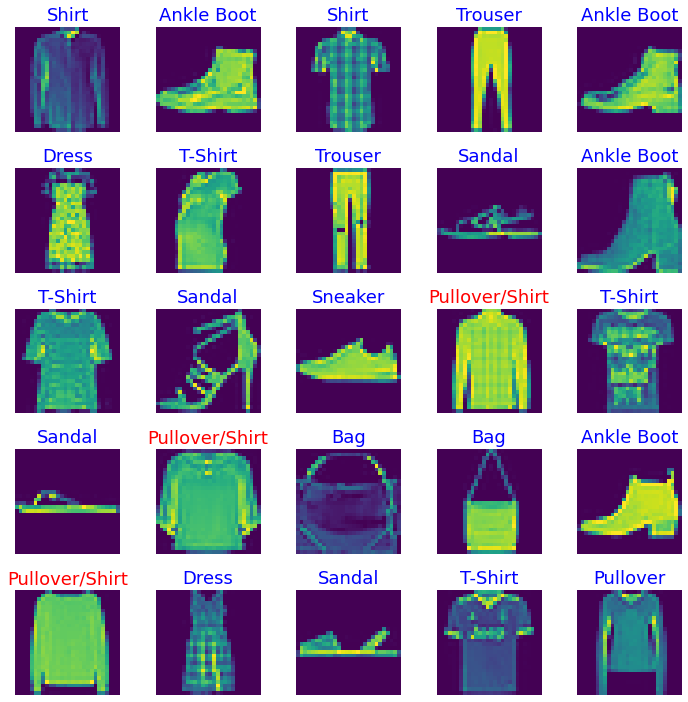

In [ ]:
test_batch_size = 25
batch_index = np.random.choice(len(X_test), size=test_batch_size, replace=False)

batch_xs = X_test[batch_index]
batch_ys = y_test[batch_index]
y_pred_ = model(batch_xs, training=False)

fig = plt.figure(figsize=(10, 10))
for i, (px, py, y_pred) in enumerate(zip(batch_xs, batch_ys, y_pred_)):
    p = fig.add_subplot(5, 5, i+1)
    if np.argmax(y_pred) == py:
        p.set_title("{}".format(labels_map[py]), color='blue')
    else:
        p.set_title("{}/{}".format(labels_map[np.argmax(y_pred)],
                               labels_map[py]), color='red')
    p.imshow(px.reshape(28, 28))
    p.axis('off')
plt.tight_layout()